In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


In [85]:
# Lists for storing extracted values
brand, model = [], []
ratings, price = [], []
processor, ram, storage = [], [], []
display, os, warranty = [], [], []
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/143.0.0.0 Safari/537.36"
}


for i in range(1, 50):

    url = "https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as="+str(i)

    response = requests.get(url, headers=headers)


    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")

        products = soup.find_all("div", class_="ZFwe0M row")

        for prod in products:

            # -------- PRODUCT NAME --------
            import re
            title_tag = prod.find("div", class_="RG5Slk")
            if title_tag:
                name = title_tag.text
                # Remove processor onwards
                clean = re.split(r'\b(intel|amd|ryzen)\b', name, flags=re.I)[0]
                # Remove RAM/storage text
                clean = re.sub(r'\b\d+\s*gb\b.*', '', clean, flags=re.I).strip()
                parts = clean.split()
                brand.append(parts[0])
                model.append(" ".join(parts[1:]))
            else:
                brand.append("NA")
                model.append("NA")


            # -------- RATING --------
            rating_tag = prod.find("div", class_="MKiFS6")
            ratings.append(rating_tag.text if rating_tag else "NA")

            # -------- PRICE --------
            price_tag = prod.find("div", class_="hZ3P6w DeU9vF")
            price.append(re.sub(r"[^\d]", "", price_tag.text) if price_tag else "NA")

            # -------- SPECIFICATIONS --------
            specs = prod.find_all("li", class_="DTBslk")

            proc = ram_val = storage_val = disp = os_val = war = "NA"

            for s in specs:
                text = s.text.lower()

                if "processor" in text or "intel" in text or "ryzen" in text:
                    proc = s.text

                elif "ram" in text:
                    ram_val = s.text

                elif "ssd" in text or "hdd" in text:
                    storage_val = s.text

                elif "inch" in text:
                    disp = s.text

                elif "windows" in text or "dos" in text or "linux" in text:
                    os_val = s.text

                elif "warranty" in text:
                    war = " ".join(s.text.split()[:2])

            processor.append(proc)
            ram.append(ram_val)
            storage.append(storage_val)
            display.append(disp)
            os.append(os_val)
            warranty.append(war)

    else:
        print("Failed to fetch page:", i, response.status_code)

In [108]:
df = pd.DataFrame({
    "Brand": brand,
    "Model": model,
    "Price": price,
    "Ratings": ratings,
    "Processor": processor,
    "RAM": ram,
    "Storage": storage,
    "Display": display,
    "OS": os,
    "Warranty": warranty
})

In [109]:
df.head()

,Brand,Model,Price,Ratings,Processor,RAM,Storage,Display,OS,Warranty
0,Samsung,Galaxy Book4 Metal,47730,4.4,Intel Core i5 Processor (13th Gen),8 GB LPDDR4X RAM,512 GB SSD,39.62 cm (15.6 Inch) Display,Windows 11 Operating System,1 Year
1,HP,,68990,4.3,Intel Core i7 Processor (13th Gen),16 GB DDR4 RAM,512 GB SSD,39.62 cm (15.6 Inch) Display,Windows 11 Home Operating System,1 Year
2,Acer,Aspire 3,45990,4.3,Intel Core i5 Processor (13th Gen),16 GB DDR4 RAM,512 GB SSD,35.56 cm (14 Inch) Display,Windows 11 Operating System,1 Year
3,Samsung,Galaxy Book4 Metal,55570,4.4,Intel Core i7 Processor (13th Gen),16 GB LPDDR4X RAM,512 GB SSD,39.62 cm (15.6 Inch) Display,Windows 11 Operating System,1 Year
4,Lenovo,IdeaPad Slim 3,45990,4.2,Intel Core i5 Processor (12th Gen),16 GB DDR4 RAM,512 GB SSD,39.62 cm (15.6 Inch) Display,Windows 11 Home Operating System,1 Year


In [110]:
df.tail()

,Brand,Model,Price,Ratings,Processor,RAM,Storage,Display,OS,Warranty
1171,Acer,NITRO LITE 16,57990,4.5,Intel Core i5 Processor (13th Gen),16 GB DDR5 RAM,512 GB SSD,40.64 cm (16 Inch) Display,64 bit Windows 11 Home Operating System,1 Year
1172,HP,15,39990,4.2,Intel Core 3 Processor,8 GB DDR4 RAM,512 GB SSD,39.62 cm (15.6 Inch) Display,Windows 11 Home Operating System,1 Year
1173,MOTOROLA,Motobook 60 Full Metal OLED (i5 14th Gen),49990,4.4,Intel Core 5 (Series 2) Processor,16 GB DDR5 RAM,512 GB SSD,35.56 cm (14 Inch) Display,64 bit Windows 11 Operating System,1 Year
1174,Acer,Aspire 3 Backlit,45888,4.1,AMD Ryzen 7 Octa Core Processor,16 GB DDR4 RAM,1 TB SSD,39.62 cm (15.6 Inch) Display,Windows 11 Operating System,1 Year
1175,Acer,Aspire 3 Backlit,42990,4.1,AMD Ryzen 7 Octa Core Processor,16 GB DDR4 RAM,512 GB SSD,39.62 cm (15.6 Inch) Display,Windows 11 Operating System,1 Year


In [111]:
df.shape

(1176, 10)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Brand      1176 non-null   object
 1   Model      1176 non-null   object
 2   Price      1176 non-null   object
 3   Ratings    1176 non-null   object
 4   Processor  1176 non-null   object
 5   RAM        1176 non-null   object
 6   Storage    1176 non-null   object
 7   Display    1176 non-null   object
 8   OS         1176 non-null   object
 9   Warranty   1176 non-null   object
dtypes: object(10)
memory usage: 92.0+ KB


In [113]:
df.replace("NA", np.nan, inplace=True)

In [114]:
## Convert price and ratings to  numeric columns
df["Price"] = df["Price"].astype('int')
df["Ratings"] = df["Ratings"].astype('float')

In [115]:
## Extract RAM (GB)
df["RAM_GB"] = df["RAM"].str.extract(r'(\d+)').astype(float)

In [116]:
## Extract Storage (GB)
df["Storage_GB"] = df["Storage"].str.extract(r'(\d+)').astype(float)

In [117]:
## Extract Display Size (Inches)
df["Display_inch"] = df["Display"].str.extract(r'(\d+\.?\d*)').astype(float)

In [118]:
## Clean Warranty
df["Warranty_years"] = df["Warranty"].str.extract(r'(\d)').astype(float)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           1176 non-null   object 
 1   Model           1176 non-null   object 
 2   Price           1176 non-null   int64  
 3   Ratings         1143 non-null   float64
 4   Processor       1176 non-null   object 
 5   RAM             1176 non-null   object 
 6   Storage         1127 non-null   object 
 7   Display         1176 non-null   object 
 8   OS              1127 non-null   object 
 9   Warranty        1125 non-null   object 
 10  RAM_GB          1176 non-null   float64
 11  Storage_GB      1127 non-null   float64
 12  Display_inch    1176 non-null   float64
 13  Warranty_years  1125 non-null   float64
dtypes: float64(5), int64(1), object(8)
memory usage: 128.8+ KB


In [120]:
## Handle Missing Values
df.isnull().sum()

Brand              0
Model              0
Price              0
Ratings           33
Processor          0
RAM                0
Storage           49
Display            0
OS                49
Warranty          51
RAM_GB             0
Storage_GB        49
Display_inch       0
Warranty_years    51
dtype: int64

In [121]:
df.dropna(inplace=True)

In [122]:
df.isnull().sum()

Brand             0
Model             0
Price             0
Ratings           0
Processor         0
RAM               0
Storage           0
Display           0
OS                0
Warranty          0
RAM_GB            0
Storage_GB        0
Display_inch      0
Warranty_years    0
dtype: int64

In [123]:
## checking for duplicates
# Check complete duplicate rows
df.duplicated().sum()

np.int64(1005)

In [124]:
##  Checking duplicates at product level
df.duplicated(subset=["Brand", "Model", "Price"]).sum()

np.int64(1005)

In [126]:
df.shape

(1043, 14)

## Exploratory Data Analysis (EDA)

# Univariate Analysis

### Price Distribution

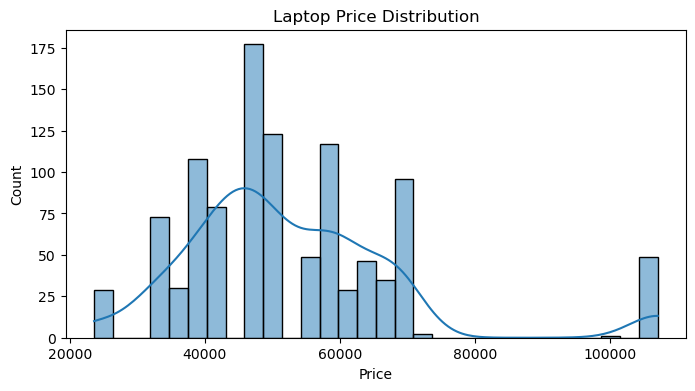

In [127]:
plt.figure(figsize=(8,4))
sns.histplot(df["Price"], bins=30, kde=True)
plt.title("Laptop Price Distribution")
plt.show()

### Ratings Distribution

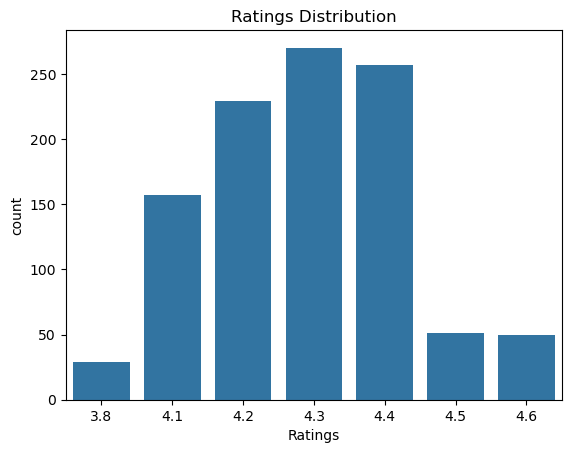

In [128]:
sns.countplot(x="Ratings", data=df)
plt.title("Ratings Distribution")
plt.show()

# Bivariate Analysis

### Price vs Ratings

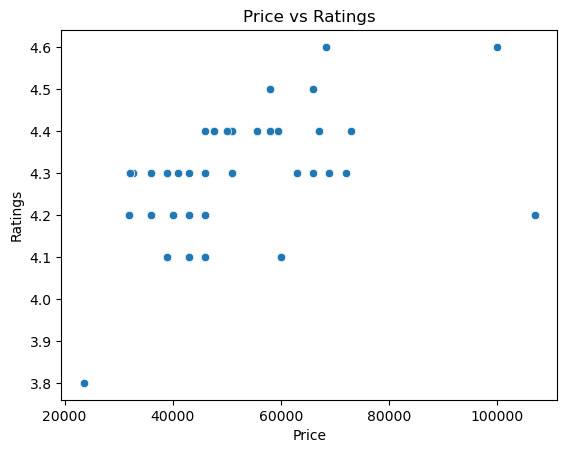

In [129]:
sns.scatterplot(x="Price", y="Ratings", data=df)
plt.title("Price vs Ratings")
plt.show()

In [130]:
df[["Price", "Ratings"]].corr()

,Price,Ratings
Price,1.000000,0.355425
Ratings,0.355425,1.000000


## Brand-wise Price Analysis

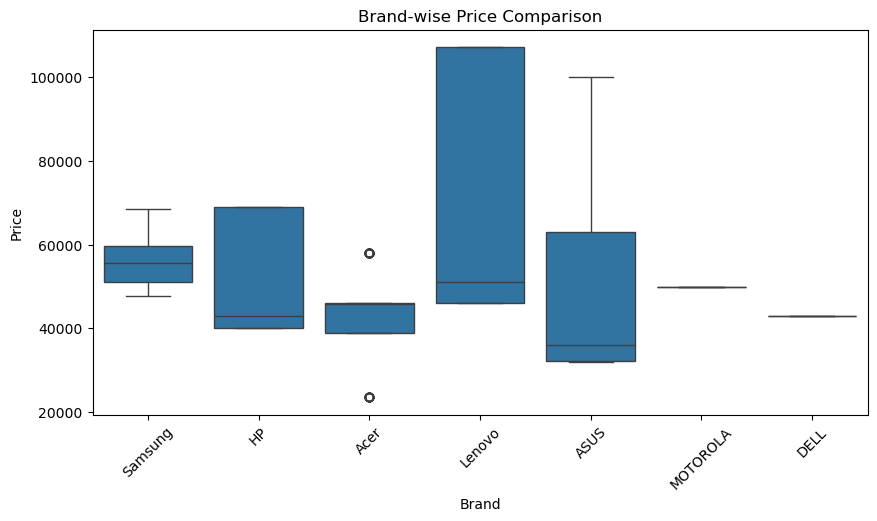

In [131]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Brand", y="Price", data=df)
plt.xticks(rotation=45)
plt.title("Brand-wise Price Comparison")
plt.show()

### Price vs RAM 

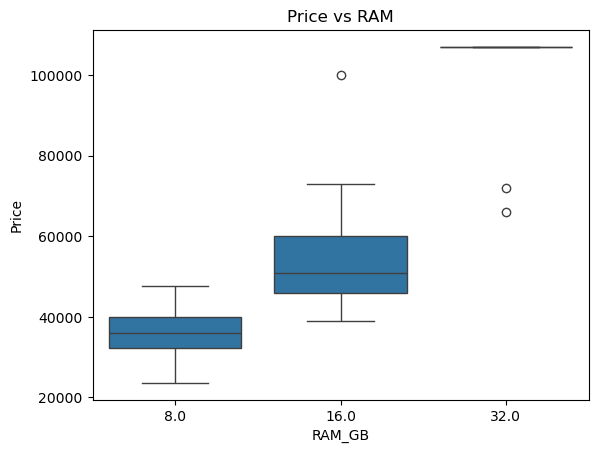

In [132]:
sns.boxplot(x="RAM_GB", y="Price", data=df)
plt.title("Price vs RAM")
plt.show()

In [133]:
df.groupby("RAM_GB")["Price"].mean()

RAM_GB
8.0      35658.558140
16.0     53799.243243
32.0    105499.803922
Name: Price, dtype: float64

### Price vs Storage

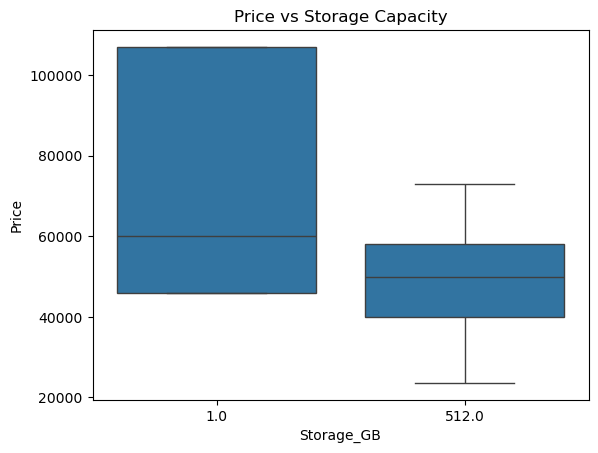

In [134]:
sns.boxplot(x="Storage_GB", y="Price", data=df)
plt.title("Price vs Storage Capacity")
plt.show()

### Processor-wise Price Analysis

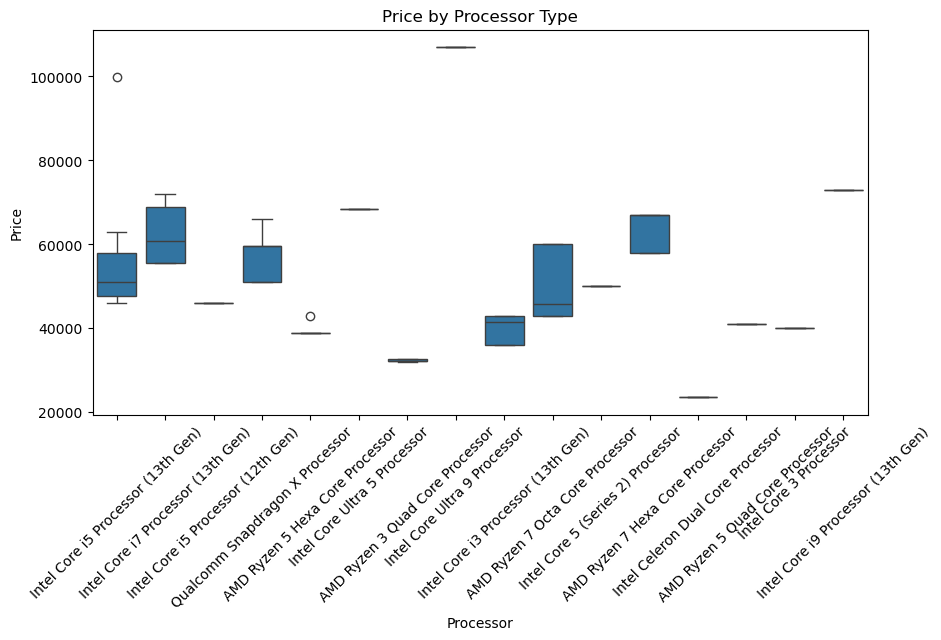

In [135]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Processor", y="Price", data=df)
plt.xticks(rotation=45)
plt.title("Price by Processor Type")
plt.show()

### OS-wise Price Analysis

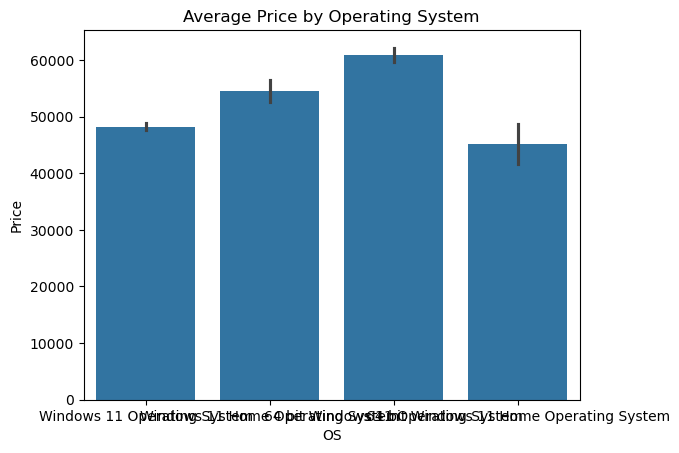

In [136]:
sns.barplot(x="OS", y="Price", data=df)
plt.title("Average Price by Operating System")
plt.show()

### Display Size vs Price

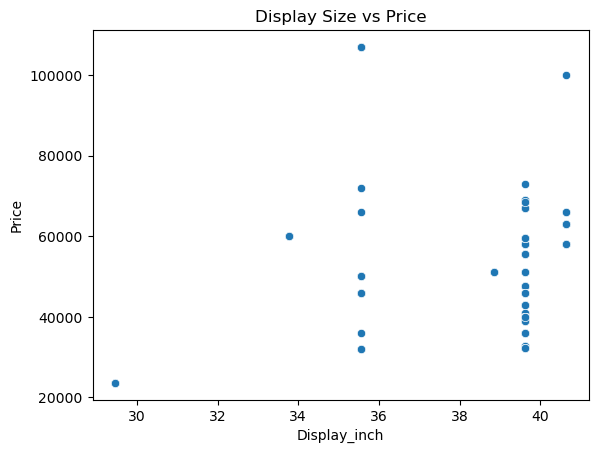

In [137]:
sns.scatterplot(x="Display_inch", y="Price", data=df)
plt.title("Display Size vs Price")
plt.show()

## Warranty vs Price

In [138]:
df.groupby("Warranty_years")["Price"].mean()

Warranty_years
1.0    52587.815916
Name: Price, dtype: float64

### Multivariate Analysis 

#### Corr of Price,Ratings,Ram,Storage,Display

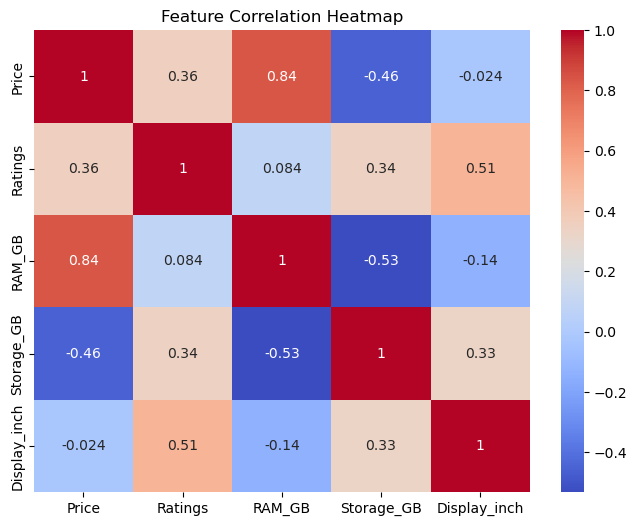

In [139]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df[["Price","Ratings","RAM_GB","Storage_GB","Display_inch"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Feature Correlation Heatmap")
plt.show()